# Descriptive Statistics for Discrete and Continues Variables

In this section we will try to undestand the statistical diferences between the sessions that contain and not contain a question fo the most importnat discrete and continuos variables according to the random forest model.


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KernelDensity
import seaborn as sns
sns.set(color_codes=True)
import scipy

In [112]:
#Read the data set
sessions = pd.read_csv('data/sessions_1Q.csv')
sessions.head()

,sessionid,event,case,startTime,completeTime,gender,age,asked_question,total_sessions,sessions_so_far,...,Visit page mijn_berichten,Visit page werkmap,Visit page mijn_documenten,Visit page mijn_sollicitaties,Visit page mijn_cv,Visit page mijn_tips,Visit page inschrijven,Visit page foutopgetreden.html,predictions,predictions_prob
0,92.0,['Visit page mijn_werkmap'],655192,2015-10-14 14:59:37,2015-10-14 14:59:37,1,35,1,45,4,...,0,0,0,0,0,0,0,0,1.0,0.154509
1,358.0,"['Visit page mijn_berichten', 'Visit page take...",1222022,2015-10-15 13:34:42,2015-10-15 13:54:38,0,23,0,26,18,...,1,0,0,0,0,0,0,0,0.0,0.060125
2,447.0,"['Visit page mijn_berichten', 'Werkmap message']",1864842,2015-10-07 11:41:55,2015-10-07 11:44:35,1,57,0,34,4,...,1,0,0,0,0,0,0,0,1.0,0.141462
3,1117.0,"['Visit page home', 'Visit page taken', 'Visit...",2069525,2015-10-30 14:28:33,2015-10-30 14:37:20,0,23,1,64,38,...,0,0,0,0,0,0,0,0,0.0,0.091008
4,1472.0,"['Visit page mijn_cv', 'Visit page mijn_werkma...",2107243,2015-10-09 10:53:23,2015-10-09 11:00:31,0,23,0,9,0,...,0,0,0,0,1,0,0,0,1.0,0.129266


In [113]:
list(sessions)

['sessionid',
 'event',
 'case',
 'startTime',
 'completeTime',
 'gender',
 'age',
 'asked_question',
 'total_sessions',
 'sessions_so_far',
 'hour',
 'timediff',
 'most_visited_page',
 'max_loops',
 'avg_steps',
 'num_events',
 'Visit page mijn_werkmap',
 'Visit page home',
 'Visit page taken',
 'Visit page vacatures_bij_mijn_cv',
 'Visit page mijn_berichten',
 'Visit page werkmap',
 'Visit page mijn_documenten',
 'Visit page mijn_sollicitaties',
 'Visit page mijn_cv',
 'Visit page mijn_tips',
 'Visit page inschrijven',
 'Visit page foutopgetreden.html',
 'predictions',
 'predictions_prob']

## 1. General Script to generate kernel funtions:

In [122]:
#Funtion to find the optimal Kernel
def mannwhitTest(x,y):
    _, p_value= scipy.stats.mannwhitneyu(x, y, use_continuity=True)
    return p_value


def create_comparison(x, x_q):
    p_value = mannwhitTest(x,x_q)
    print(p_value)
    
    data = pd.DataFrame(pd.concat([x, x_q], axis=1))
    series_name = list(data)[0]
    text = series_name + '_Q'
    data.columns = [series_name, text]
    
    plt.figure(figsize=(12,10))
    plt.title('Probabilistic Fistribution Function (p_value = {})'.format(str(round(p_value,4))))
    for i in list(data):
        #Create the model
        x_temp = data[i].dropna()
        sns.kdeplot(x_temp, shade=True, label = i + ' - n = {}'.format(len(data[i].dropna())))
        mean = np.mean(x_temp)
        plt.axvline(x=mean, linestyle='--', linewidth=0.7, color='black', label = 'mean ' + i +' = {}'.format(str(round(mean,2))))
        median = np.median(x_temp)
        plt.axvline(x=median, linestyle='--', linewidth=0.7, color='red', label = 'median ' + i +' = {}'.format(str(round(median,2))))
    
    plt.legend(loc='upper right')
    plt.ylabel('$\hat{f}(x)$')
    plt.xlabel(series_name)
    plt.show()
    plt.close()
    


## 1.1 Timediff

9.40832008353e-21


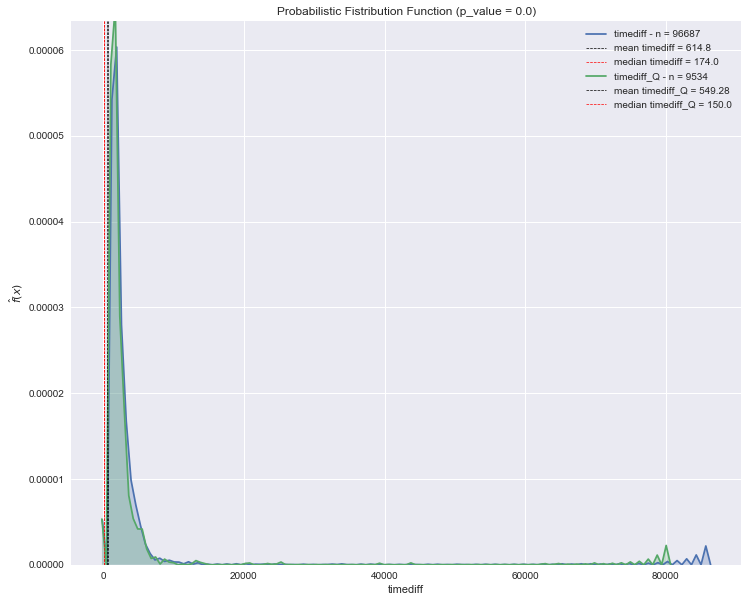

In [118]:
x = sessions['timediff'][ sessions['asked_question'] == 0 ]
x_q = sessions['timediff'][ sessions['asked_question'] == 1 ]
create_comparison(x, x_q)

## 1.2 numEvents

0.0


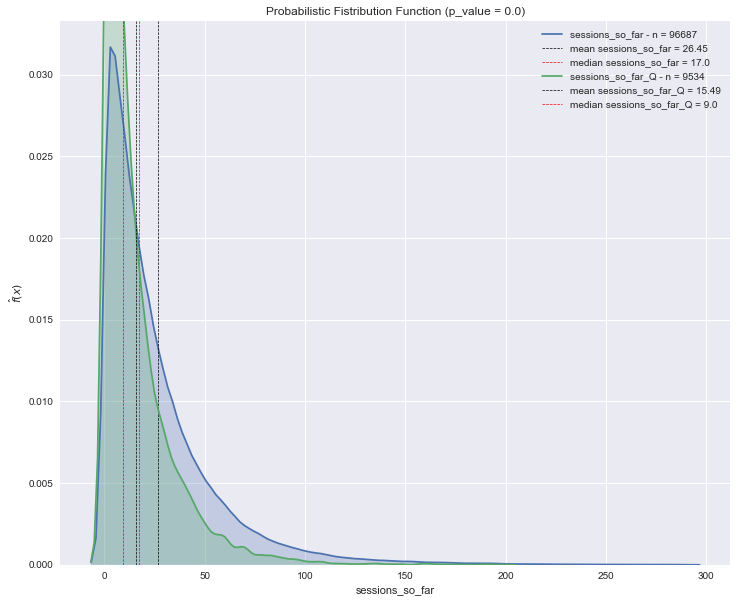

In [119]:
x = sessions['sessions_so_far'][ sessions['asked_question'] == 0 ]
x_q = sessions['sessions_so_far'][ sessions['asked_question'] == 1 ]
create_comparison(x, x_q)

## 1.4 Hour

7.22385284067e-09


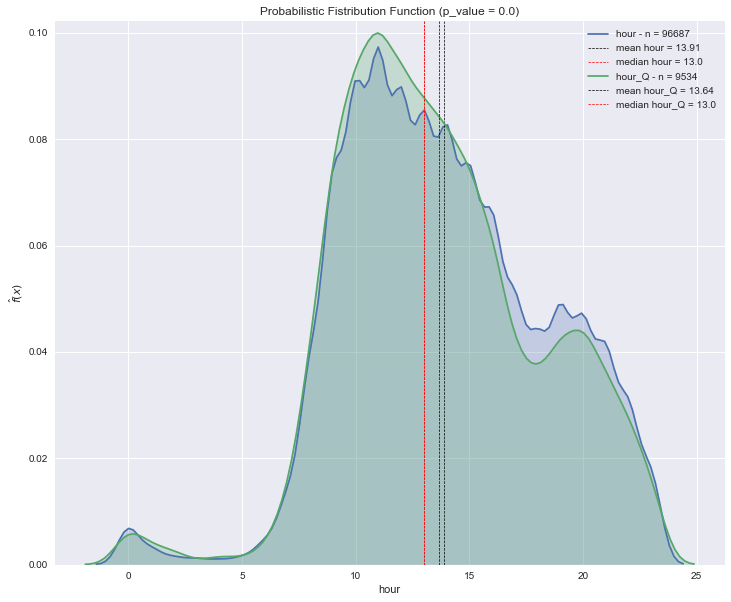

In [120]:
x = sessions['hour'][ sessions['asked_question'] == 0 ]
x_q = sessions['hour'][ sessions['asked_question'] == 1 ]
create_comparison(x, x_q)

# 1.5 Between the preditions

0.0


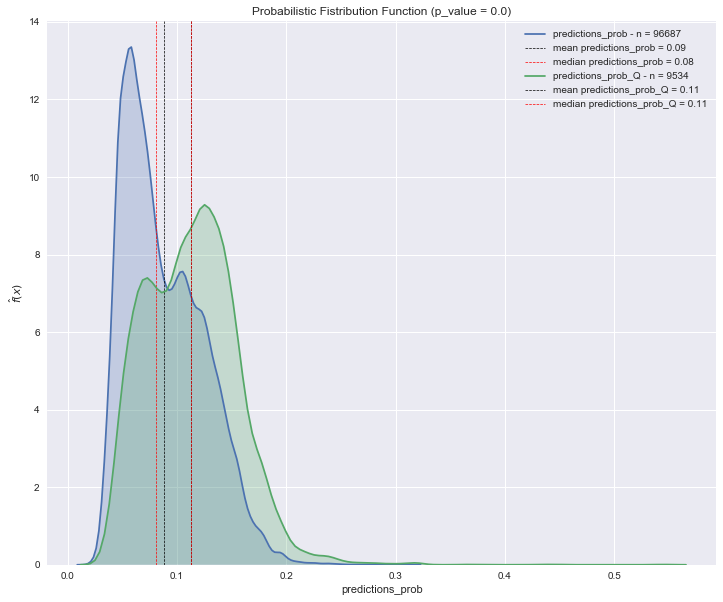

In [121]:
x = sessions['predictions_prob'][ sessions['asked_question'] == 0 ]
x_q = sessions['predictions_prob'][ sessions['asked_question'] == 1 ]
create_comparison(x, x_q)